# **Regression Trees**


## About the Dataset
Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\real_estate_data.csv")

# EXPLORATION

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [7]:
df.shape

(506, 13)

In [8]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

# PREPROCESSING

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(394, 13)

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
X=df.drop(columns='MEDV')
y=df['MEDV']

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

# TRAIN TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train.shape

(315, 12)

In [18]:
X_test.shape

(79, 12)

# BUILD A MODEL

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model=DecisionTreeRegressor(criterion="squared_error")

In [21]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
model.score(X_test,y_test)    #R2SCORE

0.835231214787169

In [23]:
yhat=model.predict(X_test)

In [24]:
yhat[0:5]

array([23. , 26.2, 23.2, 13.4, 43.1])

# EVALUATION FOR MSE CRITERION

In [64]:
(yhat-y_test).abs().mean()*1000  #AVERAGE ERROR USING MSE CRITERION

2891.139240506329

In [26]:
model=DecisionTreeRegressor(criterion="absolute_error")

In [27]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [28]:
yhatt=model.predict(X_test)

In [29]:
yhatt

array([29.6, 23.3, 14.9, 13.4, 43.1, 42.3, 26.6, 20.1, 29.8, 16.8, 14.3,
       19.4,  9.6, 50. , 14.9, 25.3, 19.9, 24.8, 14.4, 22. , 30.1, 17.4,
       12.8, 21.4, 14.4,  5.6, 19.7,  5. , 23.6, 22.8, 12.6, 19.8, 25. ,
       19.8, 33.4, 21.7, 46. , 11.5, 33.4, 13.1, 34.9, 23. , 12.8, 17.8,
       13.6, 46. , 18.8, 24.8, 24.3, 19.5, 21.7, 24.8, 23.9, 22.6,  6.3,
       26.7, 10.4, 21. , 13.5, 16.3, 13.1, 21.2, 34.9, 18.7, 29. , 29. ,
       13.1, 20.4, 12.1, 14.4, 23.8, 38.7, 15. , 21. , 13.1, 13.1, 21. ,
       19.5, 19. ])

# EVALUATION FOR MEAN ABSOLUTE ERROR CRITERION

In [30]:
model.score(X_test,y_test)

0.8732376505140534

In [70]:
print('$',(yhatt-y_test).abs().mean()*1000 ) #average error USING MAE CRITERION  #Median value of owner-occupied homes in ($1000s)

$ 2545.569620253164


MAE AND MSE MAE SHOWED HIGH R2_SCORE AND LOW AVERAGE ERROR

# **Taxi Tip Prediction using Scikit-Learn and Snap ML**


In this exercise session you will consolidate your machine learning (ML) modeling skills by using a popular regression model: Decision Tree. You will use a real dataset to train such a model. The dataset includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). You will use the trained model to predict the amount of tip paid. 

In the current exercise session, you will practice not only the Scikit-Learn Python interface, but also the Python API offered by the Snap Machine Learning (Snap ML) library. Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy.


In [1]:
import pandas as pd

# LOADING DATA

In [3]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\yellow_tripdata_2019-06.csv")

# EXPLORE DATA

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01-06-2019 00:55,01-06-2019 00:56,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,01-06-2019 00:06,01-06-2019 00:06,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,01-06-2019 00:17,01-06-2019 00:36,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,01-06-2019 00:59,01-06-2019 00:59,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [7]:
len(df)

1048575

In [9]:
df.shape

(1048575, 18)

In [11]:
len(df.columns)

18

In [13]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01-06-2019 00:55,01-06-2019 00:56,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,01-06-2019 00:06,01-06-2019 00:06,1,0.00,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,01-06-2019 00:17,01-06-2019 00:36,1,4.40,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,01-06-2019 00:59,01-06-2019 00:59,0,0.80,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,05-06-2019 16:29,05-06-2019 16:52,1,2.99,1,N,79,230,2,16.5,1.0,0.5,0.00,0.0,0.3,20.80,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,14.00,2.5
1048572,2,05-06-2019 16:19,05-06-2019 16:47,1,1.95,1,N,249,230,1,17.5,1.0,0.5,4.36,0.0,0.3,26.16,2.5
1048573,2,05-06-2019 16:50,05-06-2019 17:07,1,1.68,1,N,161,233,2,11.5,1.0,0.5,0.00,0.0,0.3,15.80,2.5


# DATA MODELING

 # df=df['tip_amount']>0 # only one column showed

In [16]:
# some trips report 0 tip. it is assumed that these tips were paid in cash.
# for this study we drop all these rows
df=df[df['tip_amount']>0] #it showed all columns above tip_amount 0
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,01-06-2019 00:28,01-06-2019 00:39,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,01-06-2019 00:54,01-06-2019 01:02,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,01-06-2019 00:29,01-06-2019 01:03,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,01-06-2019 00:01,01-06-2019 00:16,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,05-06-2019 16:49,05-06-2019 16:54,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,11.30,2.5
1048565,2,05-06-2019 16:01,05-06-2019 16:19,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,17.30,2.5
1048568,2,05-06-2019 16:49,05-06-2019 17:09,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,20.76,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,14.00,2.5


In [18]:
# we also remove some outliers, namely those where the tip was larger than the fare cost
df=df[df['tip_amount']<=df['fare_amount']]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,01-06-2019 00:28,01-06-2019 00:39,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,01-06-2019 00:54,01-06-2019 01:02,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,01-06-2019 00:29,01-06-2019 01:03,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,01-06-2019 00:01,01-06-2019 00:16,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,05-06-2019 16:49,05-06-2019 16:54,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,11.30,2.5
1048565,2,05-06-2019 16:01,05-06-2019 16:19,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,17.30,2.5
1048568,2,05-06-2019 16:49,05-06-2019 17:09,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,20.76,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,14.00,2.5


In [20]:
# we remove trips with very large fare cost
df=df[(df['fare_amount']>=2) & (df['fare_amount']<200)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,01-06-2019 00:28,01-06-2019 00:39,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,01-06-2019 00:54,01-06-2019 01:02,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,01-06-2019 00:29,01-06-2019 01:03,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,01-06-2019 00:01,01-06-2019 00:16,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,05-06-2019 16:49,05-06-2019 16:54,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,11.30,2.5
1048565,2,05-06-2019 16:01,05-06-2019 16:19,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,17.30,2.5
1048568,2,05-06-2019 16:49,05-06-2019 17:09,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,20.76,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,14.00,2.5


In [22]:
# we drop variables that include the target variable in it, namely the total_amount
clean_data = df.drop(['total_amount'], axis=1)

In [24]:
import gc, sys
# release memory occupied by raw_data as we do not need it anymore
# we are dealing with a large dataset, thus we need to make sure we do not run out of memory
del df
gc.collect() #garbage collection it clear the large memory no longer needed returns the unreacheable objects found and collected

0

In [26]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,01-06-2019 00:28,01-06-2019 00:39,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,01-06-2019 00:54,01-06-2019 01:02,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,01-06-2019 00:29,01-06-2019 01:03,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,01-06-2019 00:01,01-06-2019 00:16,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,05-06-2019 16:49,05-06-2019 16:54,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,2.5
1048565,2,05-06-2019 16:01,05-06-2019 16:19,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,2.5
1048568,2,05-06-2019 16:49,05-06-2019 17:09,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,2.5


In [28]:
print('no of observations',str(len(clean_data)))

no of observations 715265


In [30]:
print('no of variables',str(len(clean_data.columns)))

no of variables 17


In [32]:
import matplotlib.pyplot as plt
%matplotlib.inline #it displays the plot right below the code

UsageError: Line magic function `%matplotlib.inline` not found.


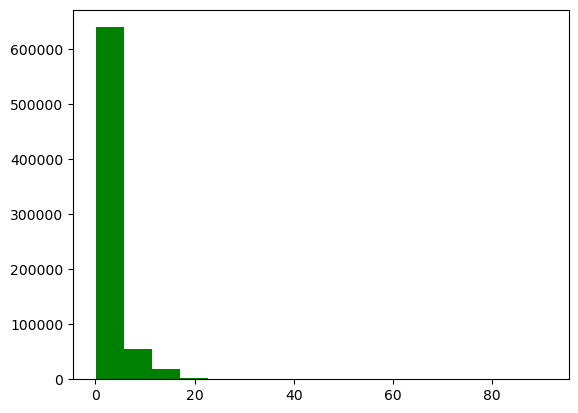

In [41]:
plt.hist(clean_data.tip_amount,16,color='g',histtype='bar') # 16 bars in the plot we put 10 10 bars in the plot
plt.show()

In [43]:
import numpy as np
np.min(clean_data.tip_amount.values)

0.01

In [45]:
np.max(clean_data.tip_amount.values)

91.0

In [47]:
np.percentile(clean_data.tip_amount.values,90)

5.95

In [49]:
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,01-06-2019 00:03,01-06-2019 00:15,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,01-06-2019 00:28,01-06-2019 00:39,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,01-06-2019 00:54,01-06-2019 01:02,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,01-06-2019 00:29,01-06-2019 01:03,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,01-06-2019 00:01,01-06-2019 00:16,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,05-06-2019 16:49,05-06-2019 16:54,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,2.5
1048565,2,05-06-2019 16:01,05-06-2019 16:19,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,2.5
1048568,2,05-06-2019 16:49,05-06-2019 17:09,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,2.5
1048571,2,05-06-2019 16:04,05-06-2019 16:15,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,2.5


In [51]:
df=clean_data

# DATASET PREPROCESSING

In [53]:
import time
# Convert 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns to datetime objects
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'],errors='coerce')
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'],errors='coerce')

In [55]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-01-06 00:03:00,2019-01-06 00:15:00,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-01-06 00:28:00,2019-01-06 00:39:00,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-01-06 00:54:00,2019-01-06 01:02:00,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-01-06 00:29:00,2019-01-06 01:03:00,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-01-06 00:01:00,2019-01-06 00:16:00,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,2019-05-06 16:49:00,2019-05-06 16:54:00,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,2.5
1048565,2,2019-05-06 16:01:00,2019-05-06 16:19:00,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,2.5
1048568,2,2019-05-06 16:49:00,2019-05-06 17:09:00,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,2.5
1048571,2,2019-05-06 16:04:00,2019-05-06 16:15:00,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,2.5


In [57]:
# Extract pickup and dropoff hour
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

In [59]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour
4,1,2019-01-06 00:03:00,2019-01-06 00:15:00,1,1.70,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,2.5,0.0,0.0
5,1,2019-01-06 00:28:00,2019-01-06 00:39:00,2,1.60,1,N,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,2.5,0.0,0.0
7,1,2019-01-06 00:54:00,2019-01-06 01:02:00,2,1.20,1,N,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,2.5,0.0,1.0
9,1,2019-01-06 00:29:00,2019-01-06 01:03:00,1,8.60,1,N,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,2.5,0.0,1.0
10,2,2019-01-06 00:01:00,2019-01-06 00:16:00,1,1.74,1,N,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,2.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,2019-05-06 16:49:00,2019-05-06 16:54:00,5,0.93,1,N,239,238,1,5.5,1.0,0.5,1.50,0.0,0.3,2.5,16.0,16.0
1048565,2,2019-05-06 16:01:00,2019-05-06 16:19:00,5,1.79,1,N,230,141,1,12.0,1.0,0.5,1.00,0.0,0.3,2.5,16.0,16.0
1048568,2,2019-05-06 16:49:00,2019-05-06 17:09:00,5,1.68,1,N,230,90,1,13.0,1.0,0.5,3.46,0.0,0.3,2.5,16.0,17.0
1048571,2,2019-05-06 16:04:00,2019-05-06 16:15:00,1,1.45,1,N,137,113,1,8.5,1.0,0.5,1.20,0.0,0.3,2.5,16.0,16.0


In [61]:
# Extract pickup and dropoff day of the week (0 = Monday, 6 = Sunday)
df['pickup_day']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.weekday

In [63]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day
4,1,2019-01-06 00:03:00,2019-01-06 00:15:00,1,1.70,1,N,113,148,1,...,3.0,0.5,2.65,0.0,0.3,2.5,0.0,0.0,6.0,6.0
5,1,2019-01-06 00:28:00,2019-01-06 00:39:00,2,1.60,1,N,79,125,1,...,3.0,0.5,1.00,0.0,0.3,2.5,0.0,0.0,6.0,6.0
7,1,2019-01-06 00:54:00,2019-01-06 01:02:00,2,1.20,1,N,79,249,1,...,3.0,0.5,1.00,0.0,0.3,2.5,0.0,1.0,6.0,6.0
9,1,2019-01-06 00:29:00,2019-01-06 01:03:00,1,8.60,1,N,186,243,1,...,3.0,0.5,7.05,0.0,0.3,2.5,0.0,1.0,6.0,6.0
10,2,2019-01-06 00:01:00,2019-01-06 00:16:00,1,1.74,1,N,107,148,1,...,0.5,0.5,2.96,0.0,0.3,2.5,0.0,0.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,2019-05-06 16:49:00,2019-05-06 16:54:00,5,0.93,1,N,239,238,1,...,1.0,0.5,1.50,0.0,0.3,2.5,16.0,16.0,0.0,0.0
1048565,2,2019-05-06 16:01:00,2019-05-06 16:19:00,5,1.79,1,N,230,141,1,...,1.0,0.5,1.00,0.0,0.3,2.5,16.0,16.0,0.0,0.0
1048568,2,2019-05-06 16:49:00,2019-05-06 17:09:00,5,1.68,1,N,230,90,1,...,1.0,0.5,3.46,0.0,0.3,2.5,16.0,17.0,0.0,0.0
1048571,2,2019-05-06 16:04:00,2019-05-06 16:15:00,1,1.45,1,N,137,113,1,...,1.0,0.5,1.20,0.0,0.3,2.5,16.0,16.0,0.0,0.0


In [64]:
# Calculate trip time in seconds

In [93]:
df['trip_time']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()

In [95]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-01-06 00:03:00,2019-01-06 00:15:00,1,1.70,1,N,113,148,1,...,0.5,2.65,0.0,0.3,2.5,0.0,0.0,6.0,6.0,720.0
5,1,2019-01-06 00:28:00,2019-01-06 00:39:00,2,1.60,1,N,79,125,1,...,0.5,1.00,0.0,0.3,2.5,0.0,0.0,6.0,6.0,660.0
7,1,2019-01-06 00:54:00,2019-01-06 01:02:00,2,1.20,1,N,79,249,1,...,0.5,1.00,0.0,0.3,2.5,0.0,1.0,6.0,6.0,480.0
9,1,2019-01-06 00:29:00,2019-01-06 01:03:00,1,8.60,1,N,186,243,1,...,0.5,7.05,0.0,0.3,2.5,0.0,1.0,6.0,6.0,2040.0
10,2,2019-01-06 00:01:00,2019-01-06 00:16:00,1,1.74,1,N,107,148,1,...,0.5,2.96,0.0,0.3,2.5,0.0,0.0,6.0,6.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,2,2019-05-06 16:49:00,2019-05-06 16:54:00,5,0.93,1,N,239,238,1,...,0.5,1.50,0.0,0.3,2.5,16.0,16.0,0.0,0.0,300.0
1048565,2,2019-05-06 16:01:00,2019-05-06 16:19:00,5,1.79,1,N,230,141,1,...,0.5,1.00,0.0,0.3,2.5,16.0,16.0,0.0,0.0,1080.0
1048568,2,2019-05-06 16:49:00,2019-05-06 17:09:00,5,1.68,1,N,230,90,1,...,0.5,3.46,0.0,0.3,2.5,16.0,17.0,0.0,0.0,1200.0
1048571,2,2019-05-06 16:04:00,2019-05-06 16:15:00,1,1.45,1,N,137,113,1,...,0.5,1.20,0.0,0.3,2.5,16.0,16.0,0.0,0.0,660.0


In [99]:
# Ideally use the full dataset for this exercise.
# However, if you run into out-of-memory issues due to the data size, reduce it.
# For instance, in this example, we use only the first 200,000 samples.
first_n_rows = 200000
clean_data = df.head(first_n_rows)
clean_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-01-06 00:03:00,2019-01-06 00:15:00,1,1.70,1,N,113,148,1,...,0.5,2.65,0.0,0.3,2.5,0.0,0.0,6.0,6.0,720.0
5,1,2019-01-06 00:28:00,2019-01-06 00:39:00,2,1.60,1,N,79,125,1,...,0.5,1.00,0.0,0.3,2.5,0.0,0.0,6.0,6.0,660.0
7,1,2019-01-06 00:54:00,2019-01-06 01:02:00,2,1.20,1,N,79,249,1,...,0.5,1.00,0.0,0.3,2.5,0.0,1.0,6.0,6.0,480.0
9,1,2019-01-06 00:29:00,2019-01-06 01:03:00,1,8.60,1,N,186,243,1,...,0.5,7.05,0.0,0.3,2.5,0.0,1.0,6.0,6.0,2040.0
10,2,2019-01-06 00:01:00,2019-01-06 00:16:00,1,1.74,1,N,107,148,1,...,0.5,2.96,0.0,0.3,2.5,0.0,0.0,6.0,6.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305279,1,2019-02-06 10:12:00,2019-02-06 10:31:00,1,4.40,1,N,79,48,1,...,0.5,3.86,0.0,0.3,2.5,10.0,10.0,2.0,2.0,1140.0
305282,1,2019-02-06 10:19:00,2019-02-06 10:37:00,1,2.80,1,N,141,48,1,...,0.5,3.35,0.0,0.3,2.5,10.0,10.0,2.0,2.0,1080.0
305283,1,2019-02-06 10:40:00,2019-02-06 10:45:00,3,1.00,1,N,230,142,1,...,0.5,2.00,0.0,0.3,2.5,10.0,10.0,2.0,2.0,300.0
305284,1,2019-02-06 10:51:00,2019-02-06 11:21:00,1,7.30,1,N,239,79,1,...,0.5,6.15,0.0,0.3,2.5,10.0,11.0,2.0,2.0,1800.0


In [101]:
# drop the pickup and dropoff datetimes
clean_data = clean_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# some features are categorical, we need to encode them
# to encode them we use one-hot encoding from the Pandas package
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
proc_data = pd.get_dummies(clean_data, columns = get_dummy_col)

# release memory occupied by clean_data as we do not need it anymore
# we are dealing with a large dataset, thus we need to make sure we do not run out of memory
del clean_data
gc.collect()

326

In [103]:
proc_data

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,dropoff_hour_21.0,dropoff_hour_22.0,dropoff_hour_23.0,pickup_day_2.0,pickup_day_5.0,pickup_day_6.0,dropoff_day_2.0,dropoff_day_3.0,dropoff_day_5.0,dropoff_day_6.0
4,1,1.70,9.5,3.0,0.5,2.65,0.0,0.3,2.5,720.0,...,False,False,False,False,False,True,False,False,False,True
5,2,1.60,9.5,3.0,0.5,1.00,0.0,0.3,2.5,660.0,...,False,False,False,False,False,True,False,False,False,True
7,2,1.20,7.5,3.0,0.5,1.00,0.0,0.3,2.5,480.0,...,False,False,False,False,False,True,False,False,False,True
9,1,8.60,31.5,3.0,0.5,7.05,0.0,0.3,2.5,2040.0,...,False,False,False,False,False,True,False,False,False,True
10,1,1.74,11.0,0.5,0.5,2.96,0.0,0.3,2.5,900.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305279,1,4.40,16.0,2.5,0.5,3.86,0.0,0.3,2.5,1140.0,...,False,False,False,True,False,False,True,False,False,False
305282,1,2.80,13.5,2.5,0.5,3.35,0.0,0.3,2.5,1080.0,...,False,False,False,True,False,False,True,False,False,False
305283,3,1.00,6.0,2.5,0.5,2.00,0.0,0.3,2.5,300.0,...,False,False,False,True,False,False,True,False,False,False
305284,1,7.30,27.5,2.5,0.5,6.15,0.0,0.3,2.5,1800.0,...,False,False,False,True,False,False,True,False,False,False


In [105]:
# extract the labels from the dataframe
proc_data=proc_data.dropna()

In [107]:
y=proc_data[['tip_amount']].values.astype('float32')
y

array([[ 2.65],
       [ 1.  ],
       [ 1.  ],
       ...,
       [ 2.  ],
       [ 6.15],
       [10.44]], dtype=float32)

In [109]:
proc_data=proc_data.drop('tip_amount',axis=1)

In [111]:
proc_data

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,VendorID_1,...,dropoff_hour_21.0,dropoff_hour_22.0,dropoff_hour_23.0,pickup_day_2.0,pickup_day_5.0,pickup_day_6.0,dropoff_day_2.0,dropoff_day_3.0,dropoff_day_5.0,dropoff_day_6.0
4,1,1.70,9.5,3.0,0.5,0.0,0.3,2.5,720.0,True,...,False,False,False,False,False,True,False,False,False,True
5,2,1.60,9.5,3.0,0.5,0.0,0.3,2.5,660.0,True,...,False,False,False,False,False,True,False,False,False,True
7,2,1.20,7.5,3.0,0.5,0.0,0.3,2.5,480.0,True,...,False,False,False,False,False,True,False,False,False,True
9,1,8.60,31.5,3.0,0.5,0.0,0.3,2.5,2040.0,True,...,False,False,False,False,False,True,False,False,False,True
10,1,1.74,11.0,0.5,0.5,0.0,0.3,2.5,900.0,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305279,1,4.40,16.0,2.5,0.5,0.0,0.3,2.5,1140.0,True,...,False,False,False,True,False,False,True,False,False,False
305282,1,2.80,13.5,2.5,0.5,0.0,0.3,2.5,1080.0,True,...,False,False,False,True,False,False,True,False,False,False
305283,3,1.00,6.0,2.5,0.5,0.0,0.3,2.5,300.0,True,...,False,False,False,True,False,False,True,False,False,False
305284,1,7.30,27.5,2.5,0.5,0.0,0.3,2.5,1800.0,True,...,False,False,False,True,False,False,True,False,False,False


In [113]:
X=proc_data.values

In [115]:
X.shape

(199751, 511)

In [119]:
from sklearn.preprocessing import normalize
# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

In [121]:
# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (199751, 511) y.shape= (199751, 1)


# TRAIN TEST SPLIT

In [123]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [167]:
X_train.shape

(139825, 511)

In [169]:
X_test.shape

(59926, 511)

# BUILDING A MODEL WITH SCIKITLEARN LIBRARY

In [171]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [173]:
# for reproducible output across multiple function calls, set random_state to a given integer value
model=DecisionTreeRegressor(max_depth=8,random_state=35)

In [175]:
import time

In [177]:
t0=time.time()
model.fit(X_train,y_train)
sklearn_time=time.time()-t0
print('training time in sklearn is {0:.5f}'.format(sklearn_time))

training time in sklearn is 10.18121


# BUILDING A MODEL WITH SNAPML LIBRARY

In [140]:
import snapml

In [145]:
from snapml import DecisionTreeRegressor

model1=DecisionTreeRegressor(max_depth=8,random_state=45)

In [147]:
t0=time.time()
model1.fit(X_train,y_train)
snapml_time=time.time()-t0
print('training time in sklearn is {0:.5f}'.format(snapml_time))

training time in sklearn is 6.66152


In [155]:
print('snapml vs scikitlearn speedup {0:.3f}'.format(sklearn_time/snapml_time))

snapml vs scikitlearn speedup 1.556


# EVALUATION FOR SCIKITLEARN & SNAPML LIBRARIES

In [187]:
from sklearn.metrics import mean_squared_error as mse

In [181]:
yha=model.predict(X_test)
yha

array([2.07322064, 1.59887462, 1.71330442, ..., 2.63789252, 2.1859983 ,
       1.84782891])

In [185]:
yhat=model1.predict(X_test)
yhat

array([2.08147216, 1.63110483, 1.81881869, ..., 2.5808742 , 2.32945347,
       1.70043111])

In [193]:
skmse=mse(y_test,yha)
print('sklearn mse',skmse)

sklearn mse 1.69561663541467


In [195]:
snapmse=mse(y_test,yhat)
print('snapml mse',snapmse)

snapml mse 1.6847224675346653


# practice

In [198]:
model1=DecisionTreeRegressor(max_depth=12,random_state=45)

In [200]:
model1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, random_state=45)

In [206]:
yh=model1.predict(X_test)

In [208]:
print('compare to the before snapml mse {}'.format(mse(y_test,yh)))

compare to the before snapml mse 1.8288955459720155


We learned that increasing the `max_depth` parameter to `12` increases the MSE
